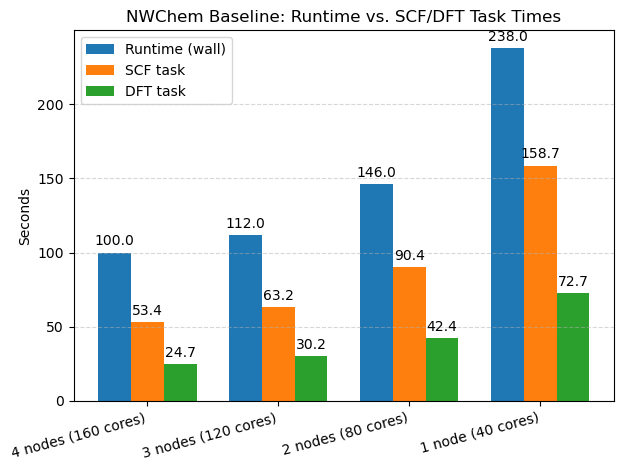

In [1]:
# Prepare the data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

labels = ["4 nodes (160 cores)", "3 nodes (120 cores)", "2 nodes (80 cores)", "1 node (40 cores)"]
runtime = [100.0, 112.0, 146.0, 238.0]
scf = [53.4, 63.2, 90.4, 158.7]   # first Task times
dft = [24.7, 30.2, 42.4, 72.7]    # second Task times

df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF task (s)": scf,
    "DFT task (s)": dft
})

# Show a quick table to verify values
# display_dataframe_to_user("NWChem Baseline Times", df)

# Plot: grouped bars per configuration (Runtime, SCF, DFT)
x = np.arange(len(labels))
width = 0.25

fig = plt.figure()
ax = plt.gca()

b1 = ax.bar(x - width, runtime, width, label="Runtime (wall)")
b2 = ax.bar(x, scf, width, label="SCF task")
b3 = ax.bar(x + width, dft, width, label="DFT task")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_ylabel("Seconds")
ax.set_title("NWChem Baseline: Runtime vs. SCF/DFT Task Times")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper left")

# Add value labels
def add_labels(bars):
    try:
        ax.bar_label(bars, padding=3, fmt="%.1f")
    except Exception:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f"{height:.1f}", ha='center', va='bottom')

add_labels(b1)
add_labels(b2)
add_labels(b3)

fig.tight_layout()

# png_path = "/mnt/data/nwchem_baseline_bars.png"
# pdf_path = "/mnt/data/nwchem_baseline_bars.pdf"
# plt.savefig(png_path, bbox_inches="tight", dpi=220)
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

# png_path, pdf_path


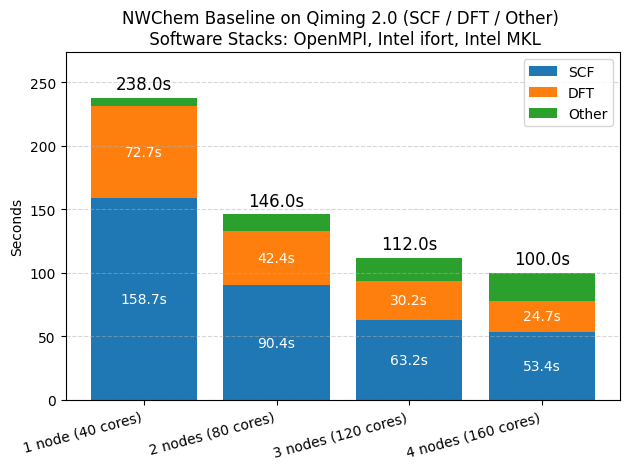

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

# Data
labels = ["4 nodes (160 cores)", "3 nodes (120 cores)", "2 nodes (80 cores)", "1 node (40 cores)"]
# reverse
labels = list(reversed(labels))

# total = np.array([246.7, 150.0, 98.7, 84.6])
# sct   = np.array([169.9,  98.4, 69.3, 58.9])
# dft   = np.array([ 76.4,  38.4, 28.7, 25.0])

runtime = np.array([100.0, 112.0, 146.0, 238.0])
# sort from high to low
runtime = np.array(sorted(runtime, reverse=True))

scf = np.array([53.4, 63.2, 90.4, 158.7])
scf = np.array(sorted(scf, reverse=True))
dft = np.array([24.7, 30.2, 42.4, 72.7])
dft = np.array(sorted(dft, reverse=True))

# Compute "Other" as the remaining part of runtime
other = runtime - (scf + dft)
# Guard against negative due to rounding
other = np.where(other < 0, 0.0, other)

# Prepare table
df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF (s)": scf,
    "DFT (s)": dft,
    "Other (s)": other,
    "SCF %": np.round(100*scf/runtime, 1),
    "DFT %": np.round(100*dft/runtime, 1),
    "Other %": np.round(100*other/runtime, 1),
})
# display_dataframe_to_user("NWChem Stacked Runtime Breakdown", df)

# list from high to low
# df = df.sort_values(by="Runtime (s)", ascending=False)

# Plot stacked bars: total equals Runtime, segments = SCF + DFT + Other
x = np.arange(len(labels))

fig = plt.figure()
ax = plt.gca()

p1 = ax.bar(x, scf, label="SCF")
p2 = ax.bar(x, dft, bottom=scf, label="DFT")
p3 = ax.bar(x, other, bottom=scf+dft, label="Other")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_ylabel("Seconds")
ax.set_title("NWChem Baseline on Qiming 2.0 (SCF / DFT / Other) \n Software Stacks: OpenMPI -- Intel ifort -- Intel MKL")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper right")

# y axis
ax.set_ylim(0, max(runtime)*1.15)

# Annotate total runtime at the top of each bar
for i, total in enumerate(runtime):
    ax.text(i, total + max(runtime)*0.015, f"{total:.1f}s", ha="center", va="bottom", fontsize=12)
    # annotate scf and dft runtime
    ax.text(i, scf[i]/2, f"{scf[i]:.1f}s", ha="center", va="center", color="white", fontsize=10)
    ax.text(i, scf[i] + dft[i]/2, f"{dft[i]:.1f}s", ha="center", va="center", color="white", fontsize=10)

fig.tight_layout()


plt.show()



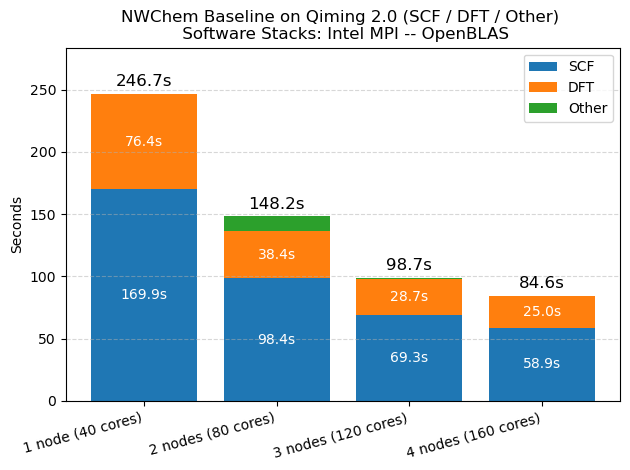

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

# Data
labels = ["4 nodes (160 cores)", "3 nodes (120 cores)", "2 nodes (80 cores)", "1 node (40 cores)"]
# reverse
labels = list(reversed(labels))

# total = np.array([246.7, 150.0, 98.7, 84.6])
# sct   = np.array([169.9,  98.4, 69.3, 58.9])
# dft   = np.array([ 76.4,  38.4, 28.7, 25.0])

runtime = np.array([246.7, 148.2, 98.7, 84.6])
# sort from high to low
runtime = np.array(sorted(runtime, reverse=True))

scf = np.array([169.9,  98.4, 69.3, 58.9])
scf = np.array(sorted(scf, reverse=True))
dft = np.array([ 76.4,  38.4, 28.7, 25.0])
dft = np.array(sorted(dft, reverse=True))

# Compute "Other" as the remaining part of runtime
other = runtime - (scf + dft)
# Guard against negative due to rounding
other = np.where(other < 0, 0.0, other)

# Prepare table
df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF (s)": scf,
    "DFT (s)": dft,
    "Other (s)": other,
    "SCF %": np.round(100*scf/runtime, 1),
    "DFT %": np.round(100*dft/runtime, 1),
    "Other %": np.round(100*other/runtime, 1),
})
# display_dataframe_to_user("NWChem Stacked Runtime Breakdown", df)

# list from high to low
# df = df.sort_values(by="Runtime (s)", ascending=False)

# Plot stacked bars: total equals Runtime, segments = SCF + DFT + Other
x = np.arange(len(labels))

fig = plt.figure()
ax = plt.gca()

p1 = ax.bar(x, scf, label="SCF")
p2 = ax.bar(x, dft, bottom=scf, label="DFT")
p3 = ax.bar(x, other, bottom=scf+dft, label="Other")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_ylabel("Seconds")
ax.set_title("NWChem Baseline on Qiming 2.0 (SCF / DFT / Other) \n Software Stacks: Intel MPI -- OpenBLAS")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper right")

# y axis
ax.set_ylim(0, max(runtime)*1.15)

# Annotate total runtime at the top of each bar
for i, total in enumerate(runtime):
    ax.text(i, total + max(runtime)*0.015, f"{total:.1f}s", ha="center", va="bottom", fontsize=12)
    # annotate scf and dft runtime
    ax.text(i, scf[i]/2, f"{scf[i]:.1f}s", ha="center", va="center", color="white", fontsize=10)
    ax.text(i, scf[i] + dft[i]/2, f"{dft[i]:.1f}s", ha="center", va="center", color="white", fontsize=10)

fig.tight_layout()


plt.show()



                Config  Runtime (s)  SCF (s)  DFT (s)  Other (s)  SCF %  \
0    1 node (40 cores)        246.7    169.9     76.4        0.4   68.9   
1   2 nodes (80 cores)        150.0     98.4     38.4       13.2   65.6   
2  3 nodes (120 cores)         98.7     69.3     28.7        0.7   70.2   
3  4 nodes (160 cores)         84.6     58.9     25.0        0.7   69.6   

   DFT %  Other %  
0   31.0      0.2  
1   25.6      8.8  
2   29.1      0.7  
3   29.6      0.8  


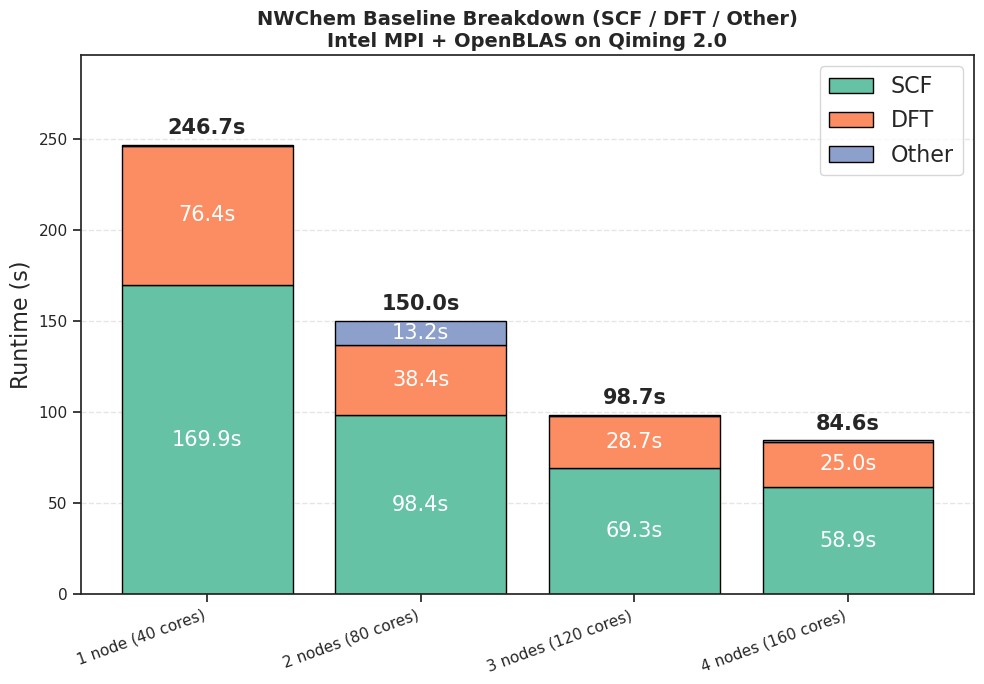

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# -----------------------------
# Seaborn style and palette
# -----------------------------
palette = sns.color_palette('Set2')
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

colors = sns.color_palette()  # 默认 Set2 色板

# -----------------------------
# Data
# -----------------------------
labels = ["1 node (40 cores)", "2 nodes (80 cores)", "3 nodes (120 cores)", "4 nodes (160 cores)"]
x = np.arange(len(labels))

runtime = np.array([246.7, 150.0, 98.7, 84.6])
scf = np.array([169.9, 98.4, 69.3, 58.9])
dft = np.array([76.4, 38.4, 28.7, 25.0])

# Compute other
other = runtime - (scf + dft)
other = np.where(other < 0, 0, other)

# Construct dataframe
df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF (s)": scf,
    "DFT (s)": dft,
    "Other (s)": other,
    "SCF %": np.round(100 * scf / runtime, 1),
    "DFT %": np.round(100 * dft / runtime, 1),
    "Other %": np.round(100 * other / runtime, 1),
})
print(df)

# -----------------------------
# Plot stacked bar chart
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 7))

# Use Set2 colors: 3 distinct tones
p1 = ax.bar(x, scf, color=colors[0], label="SCF", edgecolor='black')
p2 = ax.bar(x, dft, bottom=scf, color=colors[1], label="DFT", edgecolor='black')
p3 = ax.bar(x, other, bottom=scf + dft, color=colors[2], label="Other", edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20, ha="right")
ax.set_ylabel("Runtime (s)", fontsize=16)
ax.set_title("NWChem Baseline Breakdown (SCF / DFT / Other)\nIntel MPI + OpenBLAS on Qiming 2.0",
             fontsize=14, fontweight="bold")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper right", fontsize=16, frameon=True, fancybox=True)
ax.set_ylim(0, max(runtime) * 1.2)

# -----------------------------
# Annotate bars
# -----------------------------
for i, total in enumerate(runtime):
    ax.text(i, total + max(runtime) * 0.015, f"{total:.1f}s",
            ha="center", va="bottom", fontsize=15, fontweight="bold")
    ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s",
            ha="center", va="center", color="white", fontsize=15)
    ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s",
            ha="center", va="center", color="white", fontsize=15)
    if other[i] > 2:
        ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
                ha="center", va="center", color="white", fontsize=15)

fig.tight_layout()
plt.savefig("nwchem_baseline_stacked_set2.png", dpi=220, bbox_inches="tight")
plt.savefig("nwchem_baseline_stacked_set2.pdf", bbox_inches="tight")
plt.show()


                Config  Runtime (s)  SCF (s)  DFT (s)  Other (s)  SCF %  \
0    1 node (40 cores)        246.7    169.9     76.4        0.4   68.9   
1   2 nodes (80 cores)        150.0     98.4     38.4       13.2   65.6   
2  3 nodes (120 cores)         98.7     69.3     28.7        0.7   70.2   
3  4 nodes (160 cores)         84.6     58.9     25.0        0.7   69.6   

   DFT %  Other %  
0   31.0      0.2  
1   25.6      8.8  
2   29.1      0.7  
3   29.6      0.8  


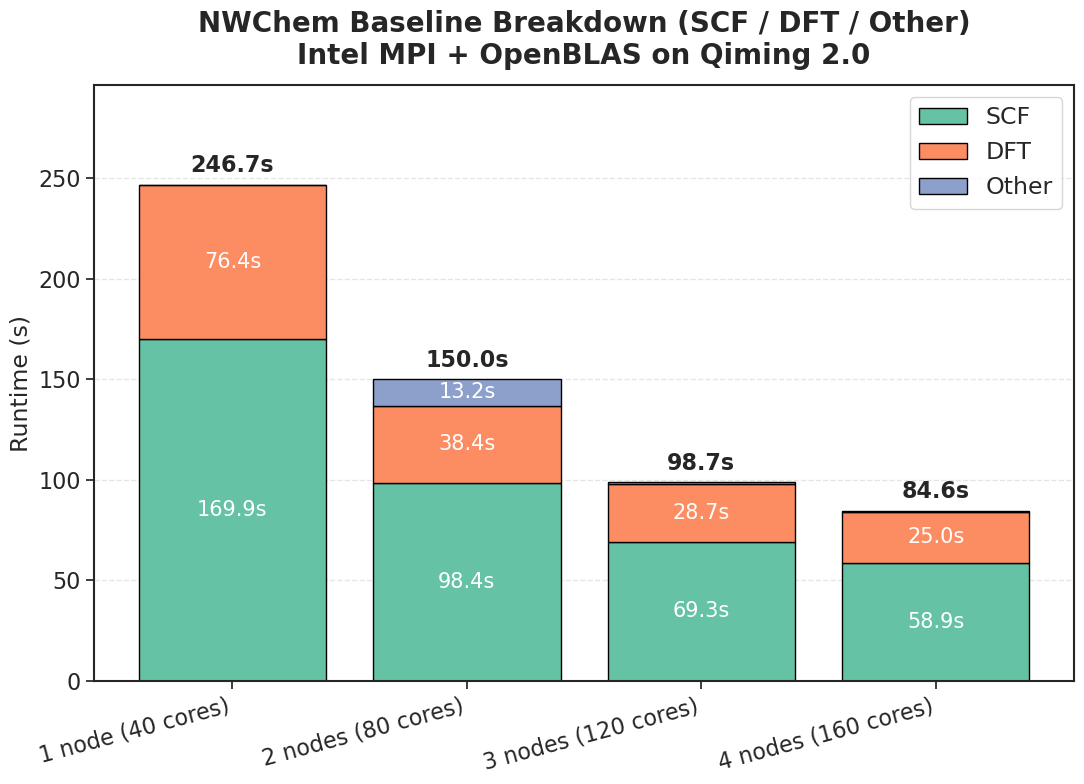

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# -----------------------------
# Seaborn style and palette
# -----------------------------
palette = sns.color_palette('Set2')
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

colors = sns.color_palette()  # 默认 Set2 色板

# -----------------------------
# Data
# -----------------------------
labels = ["1 node (40 cores)", "2 nodes (80 cores)", "3 nodes (120 cores)", "4 nodes (160 cores)"]
x = np.arange(len(labels))

runtime = np.array([246.7, 150.0, 98.7, 84.6])
scf = np.array([169.9, 98.4, 69.3, 58.9])
dft = np.array([76.4, 38.4, 28.7, 25.0])

# Compute other
other = runtime - (scf + dft)
other = np.where(other < 0, 0, other)

# Construct dataframe (可选打印)
df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": runtime,
    "SCF (s)": scf,
    "DFT (s)": dft,
    "Other (s)": other,
    "SCF %": np.round(100 * scf / runtime, 1),
    "DFT %": np.round(100 * dft / runtime, 1),
    "Other %": np.round(100 * other / runtime, 1),
})
print(df)

# -----------------------------
# Plot stacked bar chart
# -----------------------------
fig, ax = plt.subplots(figsize=(11, 8))

# Use Set2 colors
p1 = ax.bar(x, scf, color=colors[0], label="SCF", edgecolor='black')
p2 = ax.bar(x, dft, bottom=scf, color=colors[1], label="DFT", edgecolor='black')
p3 = ax.bar(x, other, bottom=scf + dft, color=colors[2], label="Other", edgecolor='black')

# -----------------------------
# Axis and legend styling
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=17)
ax.set_ylabel("Runtime (s)", fontsize=17)
ax.set_title("NWChem Baseline Breakdown (SCF / DFT / Other)\nIntel MPI + OpenBLAS on Qiming 2.0",
             fontsize=20, fontweight="bold", pad=15)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper right", fontsize=17, frameon=True, fancybox=True)
ax.set_ylim(0, max(runtime) * 1.2)

# Tick and spine styling
ax.tick_params(axis='both', which='major', labelsize=16)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# -----------------------------
# Annotate bars
# -----------------------------
for i, total in enumerate(runtime):
    ax.text(i, total + max(runtime) * 0.015, f"{total:.1f}s",
            ha="center", va="bottom", fontsize=16, fontweight="bold")
    ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s",
            ha="center", va="center", color="white", fontsize=15)
    ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s",
            ha="center", va="center", color="white", fontsize=15)
    if other[i] > 2:
        ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
                ha="center", va="center", color="white", fontsize=15)

# -----------------------------
# Layout and export
# -----------------------------
fig.tight_layout()
plt.savefig("nwchem_baseline_stacked_set2_largefont.png", dpi=220, bbox_inches="tight")
plt.savefig("nwchem_baseline_stacked_set2_largefont.pdf", bbox_inches="tight")
plt.show()


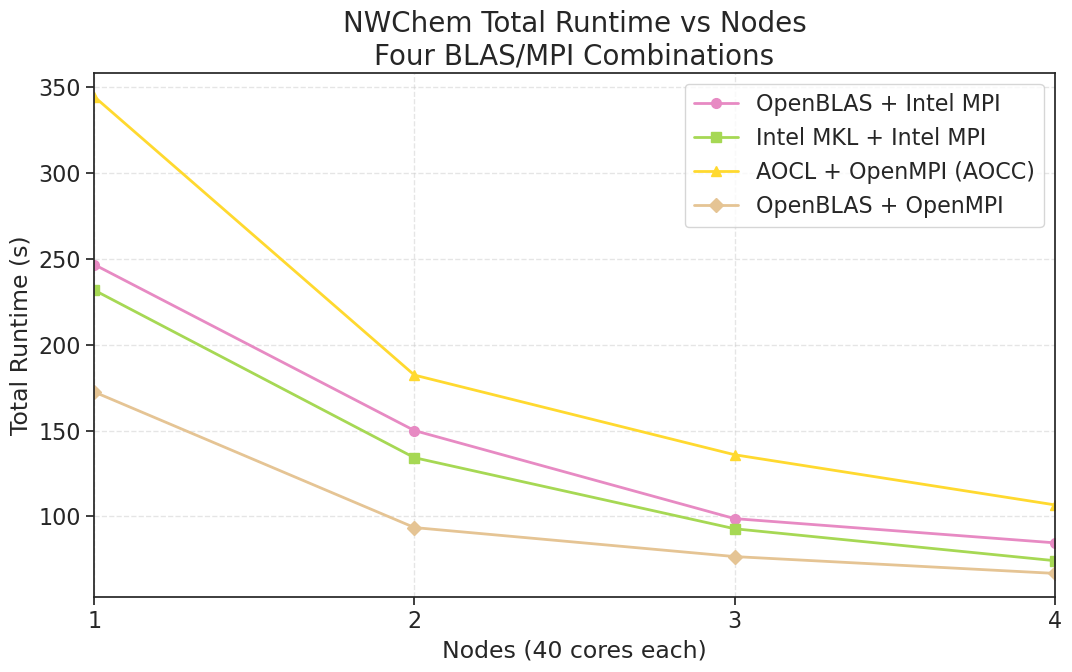

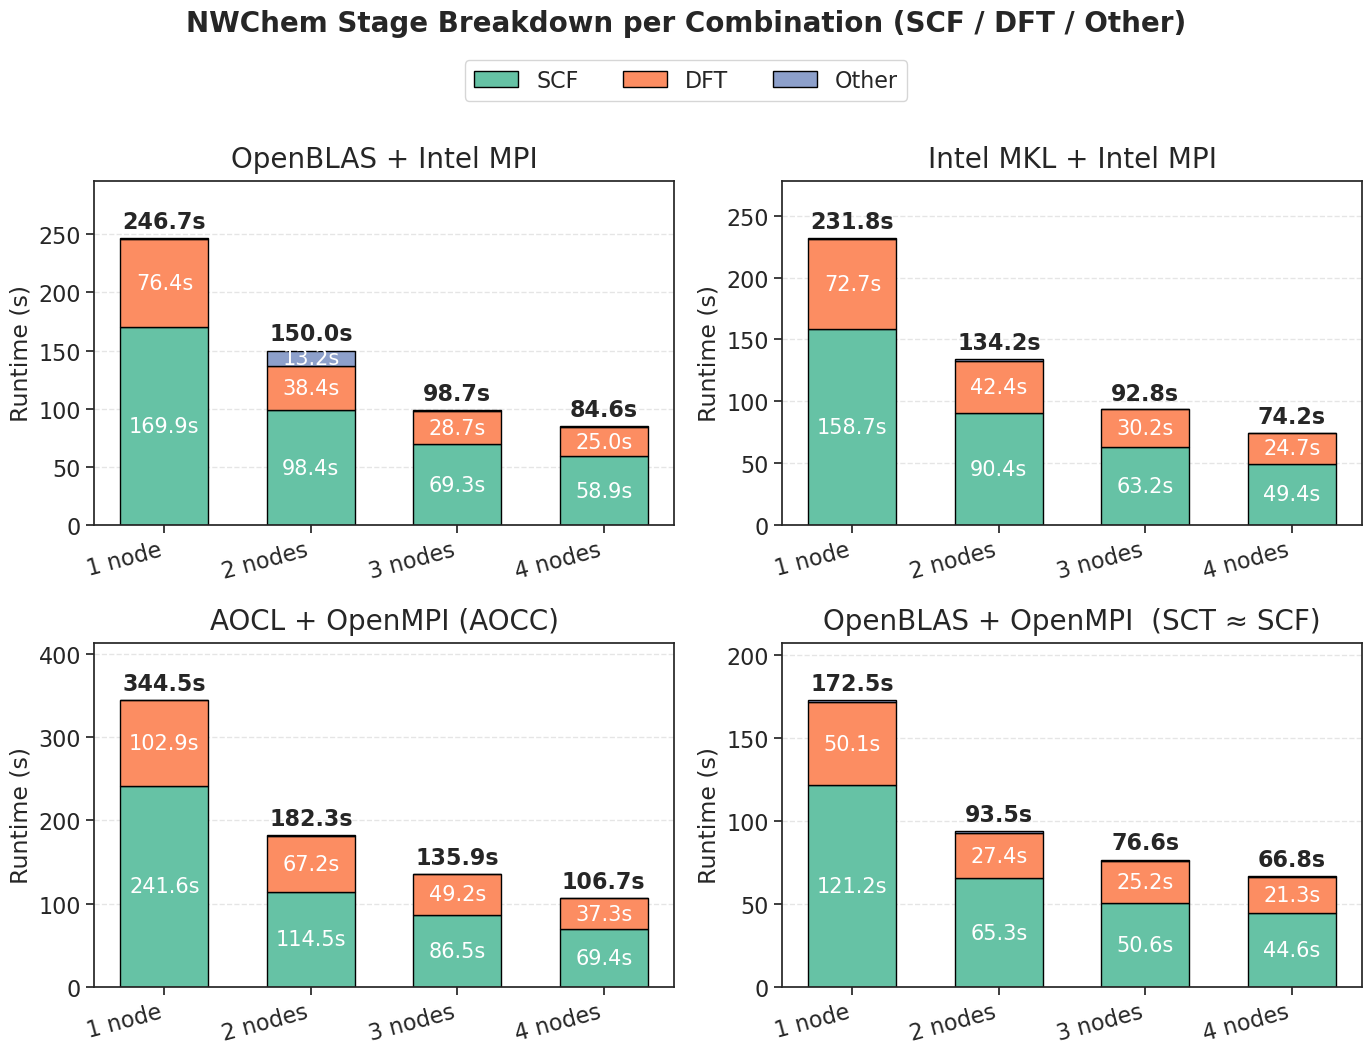


=== Total Runtime & Speedup (vs 1-node) ===
 Nodes  Total_OB+IMPI  Total_MKL+IMPI  Total_AOCL+OMPI  Total_OB+OMPI  Speedup_OB+IMPI  Speedup_MKL+IMPI  Speedup_AOCL+OMPI  Speedup_OB+OMPI
     1          246.7           231.8            344.5          172.5             1.00              1.00               1.00             1.00
     2          150.0           134.2            182.3           93.5             1.64              1.73               1.89             1.84
     3           98.7            92.8            135.9           76.6             2.50              2.50               2.53             2.25
     4           84.6            74.2            106.7           66.8             2.92              3.12               3.23             2.58


In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# =========================================================
# 全局样式（所有字体 >= 15）
# =========================================================
sns.set(style='white', palette='Set2', color_codes=False)
sns.set_style("ticks")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

colors = sns.color_palette('Set2')  # Set2 调色板
seg_colors = [colors[0], colors[1], colors[2]]  # SCF, DFT, Other
line_colors = [colors[3], colors[4], colors[5], colors[6]]  # 4 套组合的折线色

# =========================================================
# 数据（节点 1-4；“SCT” 视为 SCF）
# =========================================================
nodes = np.array([1, 2, 3, 4])

# 1) OpenBLAS + Intel MPI
tot_ob_impi = np.array([246.7, 150.0, 98.7, 84.6])
scf_ob_impi = np.array([169.9,  98.4, 69.3, 58.9])
dft_ob_impi = np.array([ 76.4,  38.4, 28.7, 25.0])

# 2) Intel MKL + Intel MPI
tot_mkl_impi = np.array([231.8, 134.2, 92.8, 74.2])
scf_mkl_impi = np.array([158.7,  90.4, 63.2, 49.4])
dft_mkl_impi = np.array([ 72.7,  42.4, 30.2, 24.7])

# # 3) AOCL + OpenMPI (AOCC 编译的 OpenMPI + AOCL)
# tot_aocl_ompi = np.array([344.5, 182.3, 135.9, 106.7])
# scf_aocl_ompi = np.array([241.6, 114.5,  86.5,  69.4])
# dft_aocl_ompi = np.array([102.9,  67.2,  49.2,  37.3])

# 4) OpenBLAS + OpenMPI  （原表中 “SCT” 这里等同于 SCF）
tot_ob_ompi = np.array([172.5,  93.5, 76.6, 66.8])
scf_ob_ompi = np.array([121.2,  65.3, 50.6, 44.6])  # “SCT”
dft_ob_ompi = np.array([ 50.1,  27.4, 25.2, 21.3])

def other_part(total, scf, dft):
    o = total - (scf + dft)
    return np.where(o < 0, 0.0, o)

# 为每组算 Other
other_ob_impi = other_part(tot_ob_impi, scf_ob_impi, dft_ob_impi)
other_mkl_impi = other_part(tot_mkl_impi, scf_mkl_impi, dft_mkl_impi)
other_aocl_ompi = other_part(tot_aocl_ompi, scf_aocl_ompi, dft_aocl_ompi)
other_ob_ompi = other_part(tot_ob_ompi, scf_ob_ompi, dft_ob_ompi)

# =========================================================
# 图 1：总时间（折线）对比
# =========================================================
fig1, ax1 = plt.subplots(figsize=(11, 7))

ax1.plot(nodes, tot_ob_impi, marker='o', linewidth=2, markersize=7,
         label='OpenBLAS + Intel MPI', color=line_colors[0])
ax1.plot(nodes, tot_mkl_impi, marker='s', linewidth=2, markersize=7,
         label='Intel MKL + Intel MPI', color=line_colors[1])
ax1.plot(nodes, tot_aocl_ompi, marker='^', linewidth=2, markersize=7,
         label='AOCL + OpenMPI (AOCC)', color=line_colors[2])
ax1.plot(nodes, tot_ob_ompi, marker='D', linewidth=2, markersize=7,
         label='OpenBLAS + OpenMPI', color=line_colors[3])

ax1.set_xlabel("Nodes (40 cores each)")
ax1.set_ylabel("Total Runtime (s)")
ax1.set_title("NWChem Total Runtime vs Nodes\nFour BLAS/MPI Combinations")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_xticks(nodes)
ax1.set_xlim(1, 4)

# 保存
fig1.tight_layout()
fig1.savefig("nwchem_total_vs_nodes.png", dpi=220, bbox_inches="tight")
fig1.savefig("nwchem_total_vs_nodes.pdf", bbox_inches="tight")

# =========================================================
# 图 2：2×2 小 multiples —— 每组一个堆叠柱（SCF/DFT/Other）
# =========================================================
def stacked_panel(ax, title, total, scf, dft, other):
    x = np.arange(len(nodes))
    bw = 0.6

    ax.bar(x, scf, width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
    ax.bar(x, dft, width=bw, bottom=scf, color=seg_colors[1], edgecolor='black', label='DFT')
    ax.bar(x, other, width=bw, bottom=scf + dft, color=seg_colors[2], edgecolor='black', label='Other')

    ymax = float(np.max(total) * 1.2)
    ax.set_ylim(0, ymax)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{n} node" if n == 1 else f"{n} nodes" for n in nodes], rotation=15, ha='right')
    ax.set_ylabel("Runtime (s)")
    ax.set_title(title, pad=10)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)

    # 标注每段与总计
    for i, t in enumerate(total):
        ax.text(i, t + ymax * 0.015, f"{t:.1f}s", ha="center", va="bottom",
                fontsize=16, fontweight="bold")
        ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s", ha="center", va="center",
                color="white", fontsize=15)
        ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s", ha="center", va="center",
                color="white", fontsize=15)
        if other[i] > 2:
            ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)

# 创建 2x2 子图
fig2, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

stacked_panel(
    axes[0, 0],
    "OpenBLAS + Intel MPI",
    tot_ob_impi, scf_ob_impi, dft_ob_impi, other_ob_impi
)
stacked_panel(
    axes[0, 1],
    "Intel MKL + Intel MPI",
    tot_mkl_impi, scf_mkl_impi, dft_mkl_impi, other_mkl_impi
)

stacked_panel(
    axes[1, 1],
    "OpenBLAS + OpenMPI  (SCT ≈ SCF)",
    tot_ob_ompi, scf_ob_ompi, dft_ob_ompi, other_ob_ompi
)

# 统一图例（只放一处）
handles, labels = axes[0, 0].get_legend_handles_labels()
fig2.legend(handles, labels, loc="upper center", ncol=3, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.02))

fig2.suptitle("NWChem Stage Breakdown per Combination (SCF / DFT / Other)", y=1.06, fontsize=20, fontweight='bold')
fig2.tight_layout()
fig2.savefig("nwchem_stacked_panels.png", dpi=220, bbox_inches="tight")
fig2.savefig("nwchem_stacked_panels.pdf", bbox_inches="tight")
plt.show()

# =========================================================
# （可选）打印对比表 & Speedup（相对 1 节点）
# =========================================================
def speedup(arr): return arr[0] / arr
summary = pd.DataFrame({
    "Nodes": nodes,
    "Total_OB+IMPI": tot_ob_impi,
    "Total_MKL+IMPI": tot_mkl_impi,
    "Total_AOCL+OMPI": tot_aocl_ompi,
    "Total_OB+OMPI": tot_ob_ompi,
    "Speedup_OB+IMPI": np.round(speedup(tot_ob_impi), 2),
    "Speedup_MKL+IMPI": np.round(speedup(tot_mkl_impi), 2),
    "Speedup_AOCL+OMPI": np.round(speedup(tot_aocl_ompi), 2),
    "Speedup_OB+OMPI": np.round(speedup(tot_ob_ompi), 2),
})
print("\n=== Total Runtime & Speedup (vs 1-node) ===")
print(summary.to_string(index=False))


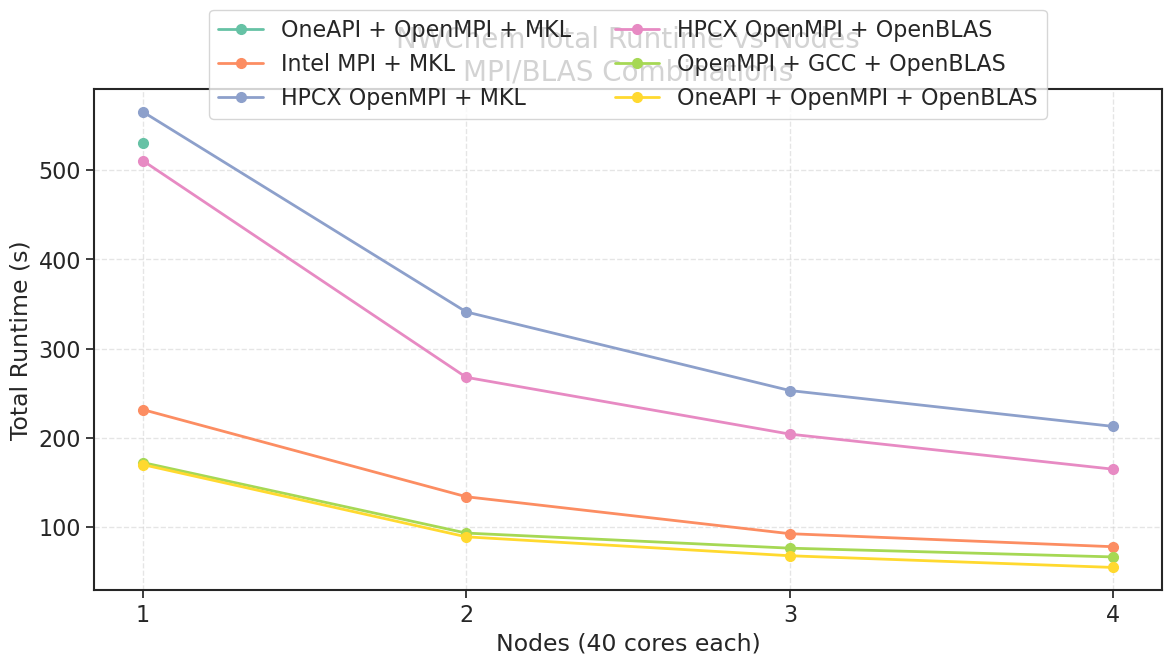

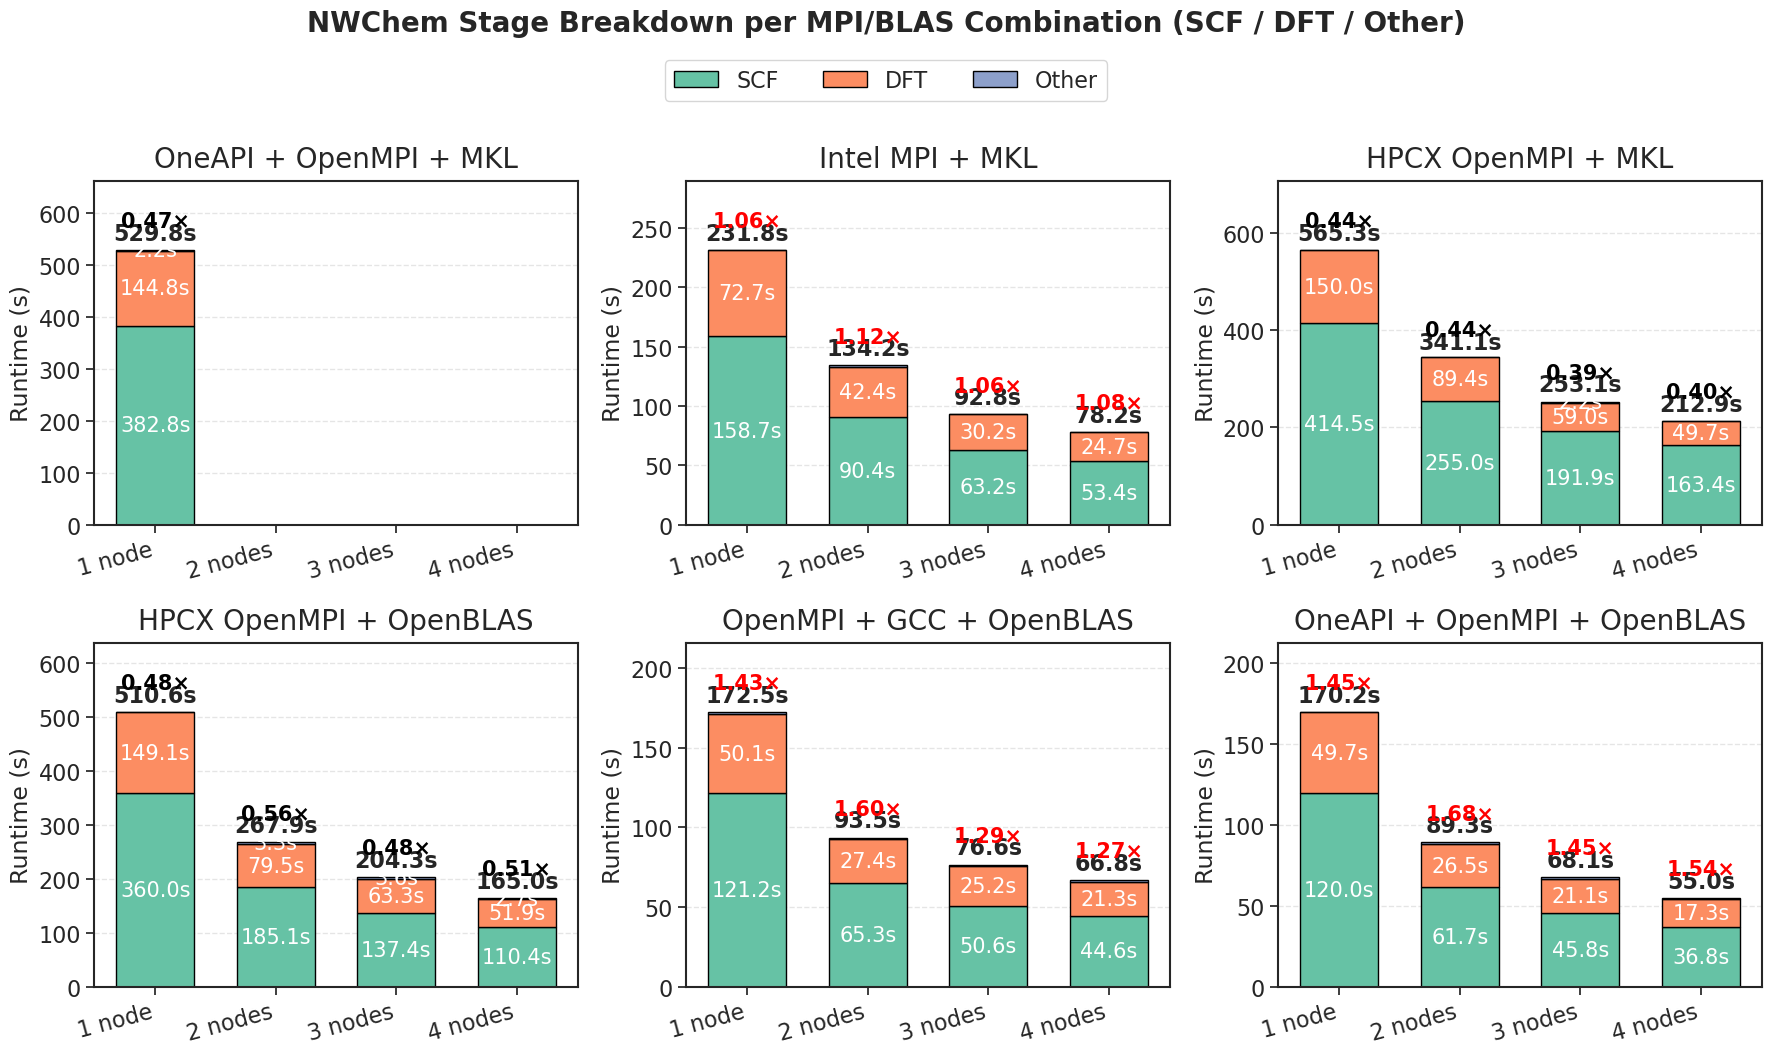


=== Total Runtime & Speedup (vs 1-node) ===
                      Combo  Nodes 1  Nodes 2  Nodes 3  Nodes 4  Speedup@2  Speedup@3  Speedup@4
     OneAPI + OpenMPI + MKL    529.8      NaN      NaN      NaN        NaN        NaN        NaN
            Intel MPI + MKL    231.8    134.2     92.8     78.2       1.73       2.50       2.96
         HPCX OpenMPI + MKL    565.3    341.1    253.1    212.9       1.66       2.23       2.66
    HPCX OpenMPI + OpenBLAS    510.6    267.9    204.3    165.0       1.91       2.50       3.09
   OpenMPI + GCC + OpenBLAS    172.5     93.5     76.6     66.8       1.84       2.25       2.58
OneAPI + OpenMPI + OpenBLAS    170.2     89.3     68.1     55.0       1.91       2.50       3.09


In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# =========================
# 全局样式（所有字体 >= 15）
# =========================
sns.set(style='white', palette='Set2', color_codes=False)
sns.set_style("ticks")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

palette = sns.color_palette('Set2')
seg_colors = [palette[0], palette[1], palette[2]]  # SCF, DFT, Other
line_colors = [palette[i] for i in range(6)]       # 6 组折线配色

nodes = np.array([1, 2, 3, 4])
xlabels = [f"{n} node" if n == 1 else f"{n} nodes" for n in nodes]

baseline_total = np.array([246.7, 150.0, 98.7, 84.6], dtype=float)

# =========================
# 数据定义（缺失写 np.nan）
# =========================
# A) OneAPI + OpenMPI + MKL（仅 1 节点）
tot_oneapi_ompi_mkl = np.array([529.8, np.nan, np.nan, np.nan])
scf_oneapi_ompi_mkl = np.array([382.8, np.nan, np.nan, np.nan])
dft_oneapi_ompi_mkl = np.array([144.8, np.nan, np.nan, np.nan])

# B) Intel MPI + MKL
tot_impi_mkl = np.array([231.8, 134.2,  92.8,  78.2])
scf_impi_mkl = np.array([158.7,  90.4,  63.2,  53.4])
dft_impi_mkl = np.array([ 72.7,  42.4,  30.2,  24.7])

# C) HPCX OpenMPI + MKL
tot_hpcx_ompi_mkl = np.array([565.3, 341.1, 253.1, 212.9])
scf_hpcx_ompi_mkl = np.array([414.5, 255.0, 191.9, 163.4])
dft_hpcx_ompi_mkl = np.array([150.0,  89.4,  59.0,  49.7])

# D) HPCX OpenMPI + OpenBLAS
tot_hpcx_ompi_ob = np.array([510.6, 267.9, 204.3, 165.0])
scf_hpcx_ompi_ob = np.array([360.0, 185.1, 137.4, 110.4])
dft_hpcx_ompi_ob = np.array([149.1,  79.5,  63.3,  51.9])

# E) OpenMPI + GCC + OpenBLAS
tot_ompi_gcc_ob = np.array([172.5,  93.5,  76.6,  66.8])
scf_ompi_gcc_ob = np.array([121.2,  65.3,  50.6,  44.6])
dft_ompi_gcc_ob = np.array([ 50.1,  27.4,  25.2,  21.3])

# F) OneAPI + OpenMPI + OpenBLAS
tot_oneapi_ompi_ob = np.array([170.2,  89.3,  68.1,  55.0])
scf_oneapi_ompi_ob = np.array([120.0,  61.7,  45.8,  36.8])
dft_oneapi_ompi_ob = np.array([ 49.7,  26.5,  21.1,  17.3])

def other_part(total, scf, dft):
    o = total - (scf + dft)
    return np.where(np.isnan(o), np.nan, np.where(o < 0, 0.0, o))

data = [
    ("OneAPI + OpenMPI + MKL",     tot_oneapi_ompi_mkl, scf_oneapi_ompi_mkl, dft_oneapi_ompi_mkl),
    ("Intel MPI + MKL",            tot_impi_mkl,        scf_impi_mkl,        dft_impi_mkl),
    ("HPCX OpenMPI + MKL",         tot_hpcx_ompi_mkl,   scf_hpcx_ompi_mkl,   dft_hpcx_ompi_mkl),
    ("HPCX OpenMPI + OpenBLAS",    tot_hpcx_ompi_ob,    scf_hpcx_ompi_ob,    dft_hpcx_ompi_ob),
    ("OpenMPI + GCC + OpenBLAS",   tot_ompi_gcc_ob,     scf_ompi_gcc_ob,     dft_ompi_gcc_ob),
    ("OneAPI + OpenMPI + OpenBLAS",tot_oneapi_ompi_ob,  scf_oneapi_ompi_ob,  dft_oneapi_ompi_ob),
]

# 预计算 other
data = [(name, tot, scf, dft, other_part(tot, scf, dft)) for (name, tot, scf, dft) in data]

# =========================
# 图 1：总时间 vs 节点数（6 组合折线）
# =========================
fig1, ax1 = plt.subplots(figsize=(12, 7))

for idx, (name, tot, _, _, _) in enumerate(data):
    ax1.plot(nodes, tot, marker='o', linewidth=2, markersize=7,
             label=name, color=line_colors[idx])

ax1.set_xlabel("Nodes (40 cores each)")
ax1.set_ylabel("Total Runtime (s)")
ax1.set_title("NWChem Total Runtime vs Nodes\nMPI/BLAS Combinations")
ax1.set_xticks(nodes)
ax1.grid(True, linestyle='--', alpha=0.5)

# 图例放外侧顶部，避免遮挡
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18),
           ncol=2, frameon=True, fancybox=True)

for spine in ax1.spines.values():
    spine.set_linewidth(1.5)

fig1.tight_layout()
fig1.savefig("mpi_blas_total_vs_nodes.png", dpi=220, bbox_inches="tight")
fig1.savefig("mpi_blas_total_vs_nodes.pdf", bbox_inches="tight")

# =========================
# 图 2：2×3 小面板堆叠柱
# =========================
def stacked_panel(ax, title, total, scf, dft, other, baseline_total):
    x = np.arange(len(nodes))
    bw = 0.65

    # 处理 NaN：用 0 画高度，但不标注
    scf_h = np.nan_to_num(scf, nan=0.0)
    dft_h = np.nan_to_num(dft, nan=0.0)
    oth_h = np.nan_to_num(other, nan=0.0)
    tot_h = np.nan_to_num(total, nan=0.0)

    ax.bar(x, scf_h, width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
    ax.bar(x, dft_h, width=bw, bottom=scf_h, color=seg_colors[1], edgecolor='black', label='DFT')
    ax.bar(x, oth_h, width=bw, bottom=scf_h + dft_h, color=seg_colors[2], edgecolor='black', label='Other')

    ymax = float(np.nanmax(total) * 1.25)
    ax.set_ylim(0, ymax)
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=15, ha='right')
    ax.set_ylabel("Runtime (s)")
    ax.set_title(title, pad=10)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)

    # 标注：仅对非 NaN 的点标注
    for i in range(len(nodes)):
        if not np.isnan(total[i]):
            # 1) 原本的总时间标注（白底上方）
            ax.text(i, tot_h[i] + ymax * 0.015, f"{total[i]:.1f}s",
                    ha="center", va="bottom", fontsize=16, fontweight="bold")

            # 2) baseline speedup 标注：speedup = baseline / total
            sp = baseline_total[i] / total[i] if total[i] > 0 else np.nan
            if np.isfinite(sp):
                sp_color = 'red' if sp > 1.0 else 'black'
                # 放在时间标注上方一点
                ax.text(i, tot_h[i] + ymax * 0.085, f"{sp:.2f}×",
                        ha="center", va="bottom", fontsize=15, fontweight="bold", color=sp_color)

        if not np.isnan(scf[i]) and scf_h[i] > 0:
            ax.text(i, scf_h[i] / 2, f"{scf[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)
        if not np.isnan(dft[i]) and dft_h[i] > 0:
            ax.text(i, scf_h[i] + dft_h[i] / 2, f"{dft[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)
        if not np.isnan(other[i]) and oth_h[i] > 2:
            ax.text(i, scf_h[i] + dft_h[i] + oth_h[i] / 2, f"{other[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

fig2, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)

for i, (name, tot, scf, dft, oth) in enumerate(data):
    r, c = divmod(i, 3)
    stacked_panel(axes[r, c], name, tot, scf, dft, oth, baseline_total)


# 统一图例（取第一轴的 handles/labels）
handles, labels = axes[0, 0].get_legend_handles_labels()
fig2.legend(handles, labels, loc="upper center", ncol=3, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.02))

fig2.suptitle("NWChem Stage Breakdown per MPI/BLAS Combination (SCF / DFT / Other)",
              y=1.06, fontsize=20, fontweight='bold')
fig2.tight_layout()
fig2.savefig("mpi_blas_stacked_panels.png", dpi=220, bbox_inches="tight")
fig2.savefig("mpi_blas_stacked_panels.pdf", bbox_inches="tight")
plt.show()

# =========================
# （可选）打印摘要与 Speedup
# =========================
def speedup(arr):
    out = arr.copy().astype(float)
    out = out[0] / out
    return np.where(np.isfinite(out), np.round(out, 2), np.nan)

summary_rows = []
for name, tot, scf, dft, oth in data:
    summary_rows.append({
        "Combo": name,
        "Nodes 1": tot[0], "Nodes 2": tot[1], "Nodes 3": tot[2], "Nodes 4": tot[3],
        "Speedup@2": speedup(tot)[1], "Speedup@3": speedup(tot)[2], "Speedup@4": speedup(tot)[3],
    })
summary = pd.DataFrame(summary_rows)
print("\n=== Total Runtime & Speedup (vs 1-node) ===")
print(summary.to_string(index=False))


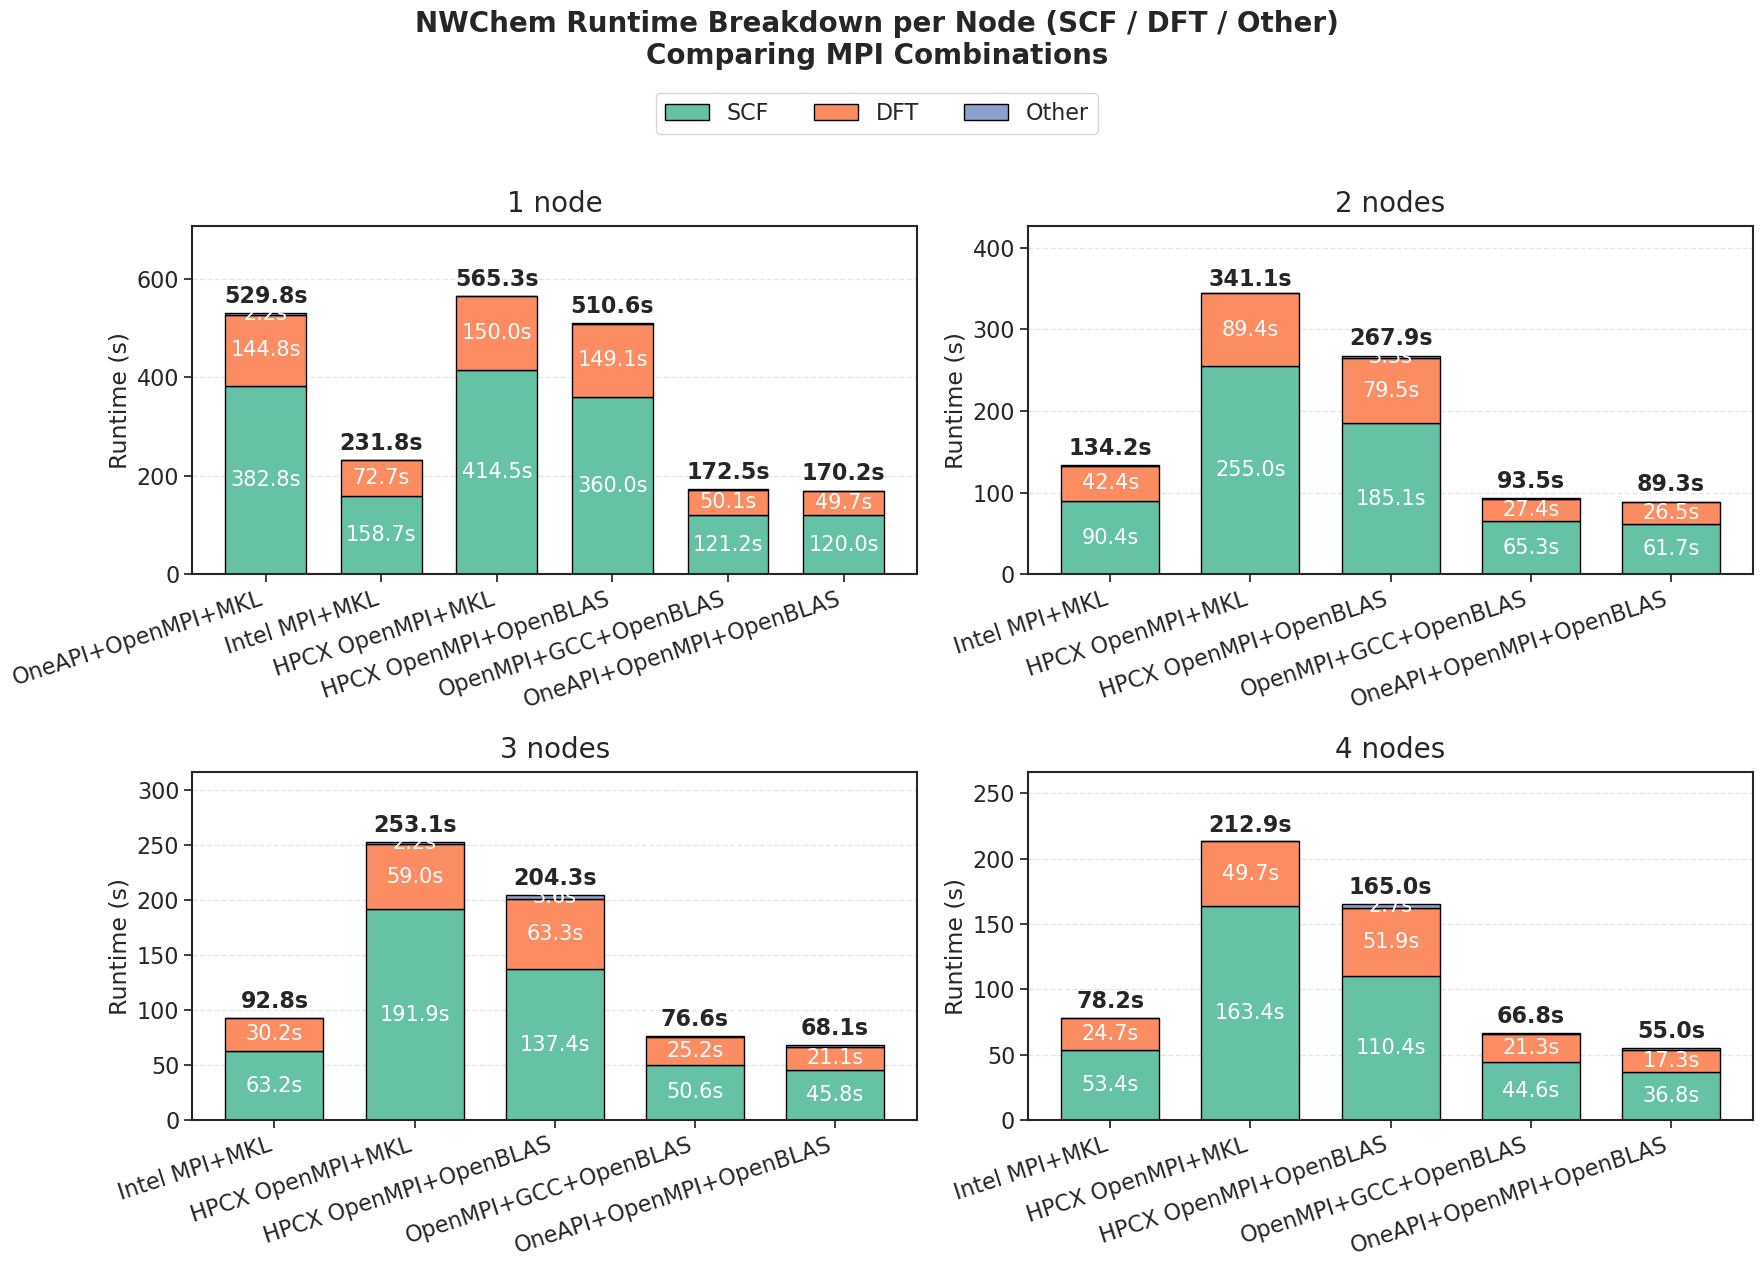


=== Best Combo per Node (by Total Runtime, lower is better) ===
1 node(s):      OneAPI+OpenMPI+OpenBLAS  -> 170.2s
2 node(s):      OneAPI+OpenMPI+OpenBLAS  -> 89.3s
3 node(s):      OneAPI+OpenMPI+OpenBLAS  -> 68.1s
4 node(s):      OneAPI+OpenMPI+OpenBLAS  -> 55.0s


In [27]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# =========================
# 全局样式（所有字体 >= 15）
# =========================
sns.set(style='white', palette='Set2', color_codes=False)
sns.set_style("ticks")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

palette = sns.color_palette('Set2')
seg_colors = [palette[0], palette[1], palette[2]]  # SCF, DFT, Other（三段颜色）

# =========================
# 数据（节点 1-4）
# =========================
nodes = np.array([1, 2, 3, 4])

# 组合顺序（与图中展示顺序一致）
combos = [
    "OneAPI+OpenMPI+MKL",
    "Intel MPI+MKL",
    "HPCX OpenMPI+MKL",
    "HPCX OpenMPI+OpenBLAS",
    "OpenMPI+GCC+OpenBLAS",
    "OneAPI+OpenMPI+OpenBLAS",
]

# 各组合的 Total/SCF/DFT（缺失用 np.nan）
tot = {
    "OneAPI+OpenMPI+MKL":       np.array([529.8,  np.nan,  np.nan,  np.nan]),
    "Intel MPI+MKL":            np.array([231.8, 134.2,   92.8,   78.2]),
    "HPCX OpenMPI+MKL":         np.array([565.3, 341.1,  253.1,  212.9]),
    "HPCX OpenMPI+OpenBLAS":    np.array([510.6, 267.9,  204.3,  165.0]),
    "OpenMPI+GCC+OpenBLAS":     np.array([172.5,  93.5,   76.6,   66.8]),
    "OneAPI+OpenMPI+OpenBLAS":  np.array([170.2,  89.3,   68.1,   55.0]),
}
scf = {
    "OneAPI+OpenMPI+MKL":       np.array([382.8,  np.nan,  np.nan,  np.nan]),
    "Intel MPI+MKL":            np.array([158.7,  90.4,   63.2,   53.4]),
    "HPCX OpenMPI+MKL":         np.array([414.5, 255.0,  191.9,  163.4]),
    "HPCX OpenMPI+OpenBLAS":    np.array([360.0, 185.1,  137.4,  110.4]),
    "OpenMPI+GCC+OpenBLAS":     np.array([121.2,  65.3,   50.6,   44.6]),
    "OneAPI+OpenMPI+OpenBLAS":  np.array([120.0,  61.7,   45.8,   36.8]),
}
dft = {
    "OneAPI+OpenMPI+MKL":       np.array([144.8,  np.nan,  np.nan,  np.nan]),
    "Intel MPI+MKL":            np.array([ 72.7,  42.4,   30.2,   24.7]),
    "HPCX OpenMPI+MKL":         np.array([150.0,  89.4,   59.0,   49.7]),
    "HPCX OpenMPI+OpenBLAS":    np.array([149.1,  79.5,   63.3,   51.9]),
    "OpenMPI+GCC+OpenBLAS":     np.array([ 50.1,  27.4,   25.2,   21.3]),
    "OneAPI+OpenMPI+OpenBLAS":  np.array([ 49.7,  26.5,   21.1,   17.3]),
}

# # 排序
# tot_sorted = {k: v for k, v in sorted(tot.items(), key=lambda item: item[1])}
# scf_sorted = {k: v for k, v in sorted(scf.items(), key=lambda item: item[1])}
# dft_sorted = {k: v for k, v in sorted(dft.items(), key=lambda item: item[1])}
# other_sorted = {k: v for k, v in sorted(other.items(), key=lambda item: item[1])}

def other_part(total, scf_arr, dft_arr):
    o = total - (scf_arr + dft_arr)
    # 保留 NaN；负数截断到 0
    return np.where(np.isnan(o), np.nan, np.where(o < 0, 0.0, o))

other = {k: other_part(tot[k], scf[k], dft[k]) for k in combos}

# =========================
# 按“节点”分组的 2×2 面板
# =========================
def panel_for_node(ax, node_idx):
    """在 ax 上绘制第 node_idx (0..3) 个节点的 6 组合堆叠柱对比"""
    bw = 0.7  # 单柱宽度
    x_positions = []
    labels_shown = []
    scf_h = []
    dft_h = []
    oth_h = []
    total_h = []

    # 收集该节点上有数据的组合
    for name in combos:
        t = tot[name][node_idx]
        s = scf[name][node_idx]
        d = dft[name][node_idx]
        o = other[name][node_idx]
        if not np.isnan(t):
            labels_shown.append(name)
            total_h.append(t)
            scf_h.append(s)
            dft_h.append(d)
            oth_h.append(o)

    k = len(labels_shown)
    x = np.arange(k)

    scf_h = np.array(scf_h)
    dft_h = np.array(dft_h)
    oth_h = np.array(oth_h)
    total_h = np.array(total_h)

    # 画堆叠柱
    ax.bar(x, scf_h, width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
    ax.bar(x, dft_h, width=bw, bottom=scf_h, color=seg_colors[1], edgecolor='black', label='DFT')
    ax.bar(x, oth_h, width=bw, bottom=scf_h + dft_h, color=seg_colors[2], edgecolor='black', label='Other')

    ymax = float(np.max(total_h) * 1.25)
    ax.set_ylim(0, ymax)
    ax.set_xticks(x)
    # 组合名较长，适当换行/旋转
    ax.set_xticklabels(labels_shown, rotation=18, ha='right')
    ax.set_ylabel("Runtime (s)")
    ax.set_title(f"{nodes[node_idx]} node" if nodes[node_idx] == 1 else f"{nodes[node_idx]} nodes", pad=10)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)

    # 注释每段与总计
    for i in range(k):
        ax.text(i, total_h[i] + ymax * 0.015, f"{total_h[i]:.1f}s",
                ha="center", va="bottom", fontsize=16, fontweight="bold")
        if scf_h[i] > 0:
            ax.text(i, scf_h[i] / 2, f"{scf_h[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)
        if dft_h[i] > 0:
            ax.text(i, scf_h[i] + dft_h[i] / 2, f"{dft_h[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)
        if oth_h[i] > 2:
            ax.text(i, scf_h[i] + dft_h[i] + oth_h[i] / 2, f"{oth_h[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

# 生成 2×2 面板
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=False)

panel_for_node(axes[0, 0], 0)  # 1 节点
panel_for_node(axes[0, 1], 1)  # 2 节点
panel_for_node(axes[1, 0], 2)  # 3 节点
panel_for_node(axes[1, 1], 3)  # 4 节点

# 统一图例（放到顶部）
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.0))

fig.suptitle("NWChem Runtime Breakdown per Node (SCF / DFT / Other)\nComparing MPI Combinations",
             y=1.06, fontsize=20, fontweight='bold')
fig.tight_layout()

# 导出
fig.savefig("mpi_blas_per_node_panels.png", dpi=220, bbox_inches="tight")
fig.savefig("mpi_blas_per_node_panels.pdf", bbox_inches="tight")
plt.show()

# =========================
# （可选）打印每节点的最佳组合
# =========================
summary = []
for ni in range(4):
    rows = []
    for name in combos:
        if not np.isnan(tot[name][ni]):
            rows.append((name, tot[name][ni]))
    rows_sorted = sorted(rows, key=lambda x: x[1])
    if rows_sorted:
        best_name, best_val = rows_sorted[0]
        summary.append((nodes[ni], best_name, best_val))

print("\n=== Best Combo per Node (by Total Runtime, lower is better) ===")
for n, nm, v in summary:
    print(f"{n} node(s): {nm:>28s}  -> {v:.1f}s")


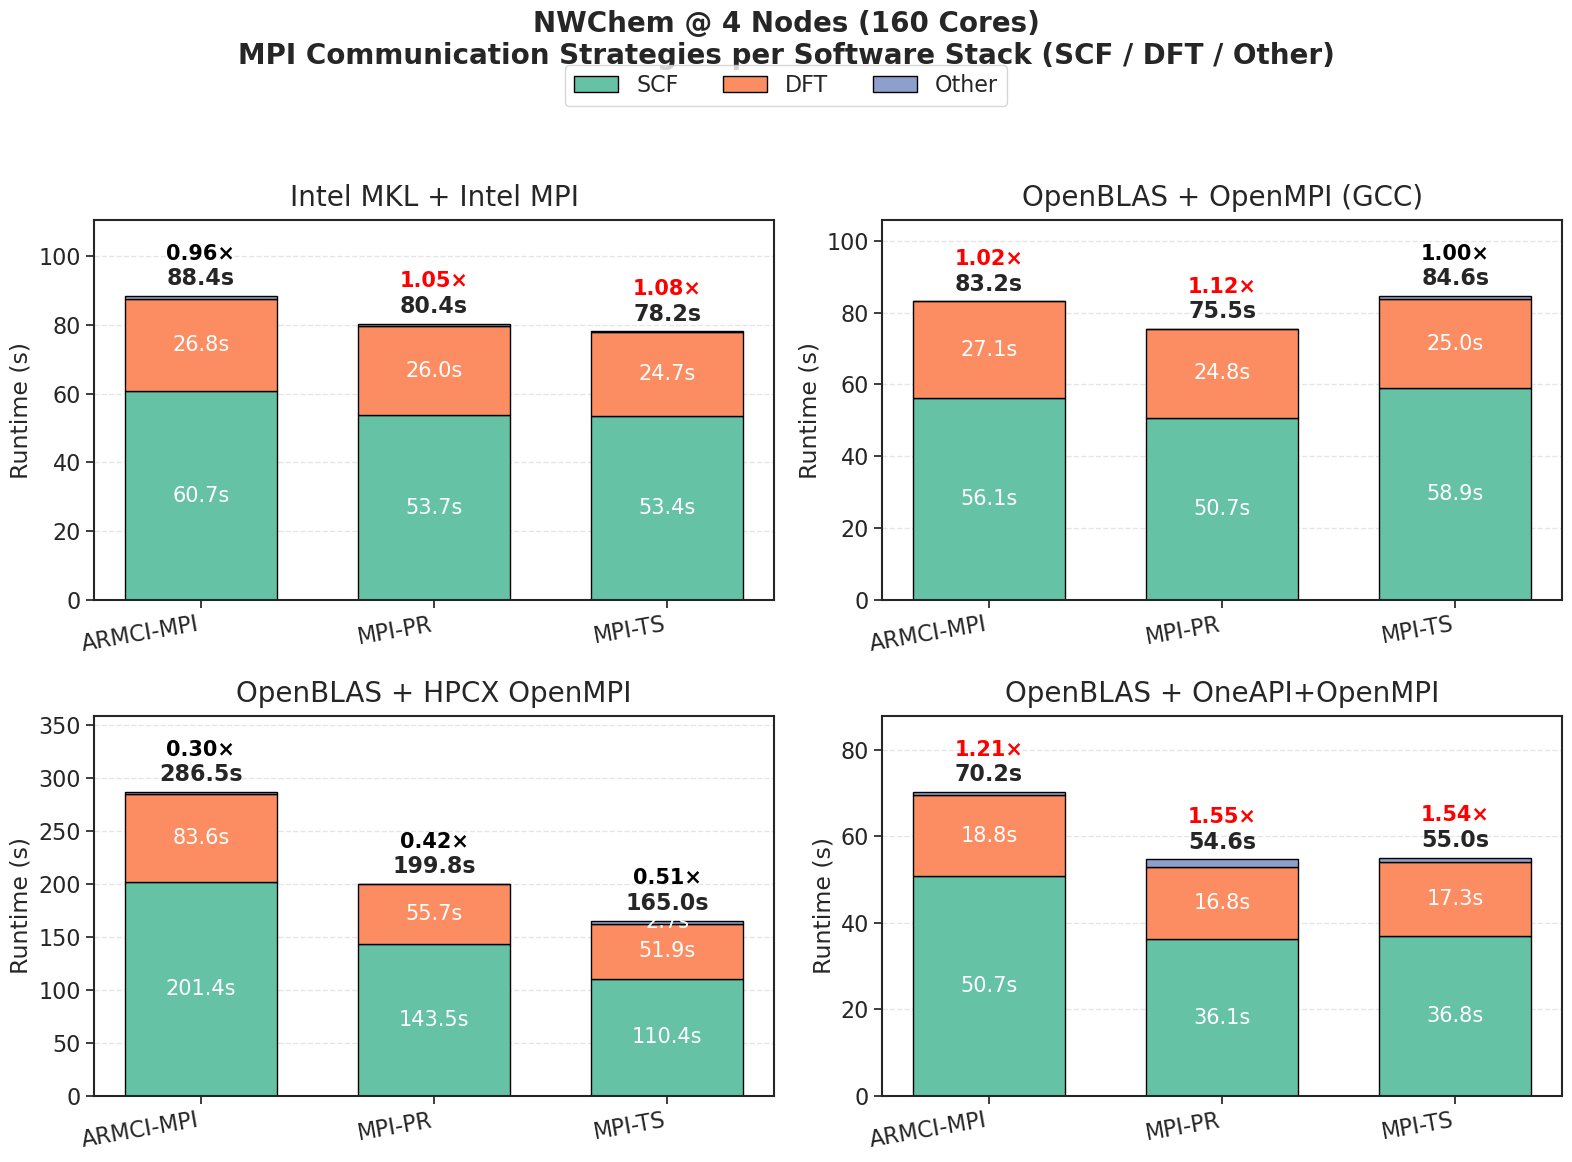


=== Best Strategy per Stack ===
           Software Stack Best Strategy (by Total time)  Best Total (s)
    Intel MKL + Intel MPI                        MPI-TS            78.2
 OpenBLAS + OpenMPI (GCC)                        MPI-PR            75.5
  OpenBLAS + HPCX OpenMPI                        MPI-TS           165.0
OpenBLAS + OneAPI+OpenMPI                        MPI-PR            54.6


In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# =========================
# 全局样式（所有字体 >= 15）
# =========================
sns.set(style='white', palette='Set2', color_codes=False)
sns.set_style("ticks")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# ===== Global baseline at 4 nodes (用于所有柱的对比) =====
BASELINE_TOTAL_4NODES = 84.6  # OpenBLAS + OpenMPI (gcc) + MPI-TS


palette = sns.color_palette('Set2')
seg_colors = [palette[0], palette[1], palette[2]]  # SCF, DFT, Other

# =========================
# 数据：4 节点（160 核）
# =========================
strategies = ["ARMCI-MPI", "MPI-PR", "MPI-TS"]

# 1) Intel MKL + Intel MPI
tot_mkl_impi  = np.array([88.4, 80.4, 78.2])
scf_mkl_impi  = np.array([60.7, 53.7, 53.4])
dft_mkl_impi  = np.array([26.8, 26.0, 24.7])

# 2) OpenBLAS + OpenMPI (gcc)
tot_ob_ompi_gcc = np.array([83.2, 75.5, 84.6])
scf_ob_ompi_gcc = np.array([56.1, 50.7, 58.9])
dft_ob_ompi_gcc = np.array([27.1, 24.8, 25.0])

# 3) OpenBLAS + HPCX OpenMPI
tot_ob_hpcx = np.array([286.5, 199.8, 165.0])
scf_ob_hpcx = np.array([201.4, 143.5, 110.4])
dft_ob_hpcx = np.array([ 83.6,  55.7,  51.9])

# 4) OpenBLAS + OneAPI+OpenMPI
tot_ob_oneapi = np.array([70.2, 54.6, 55.0])
scf_ob_oneapi = np.array([50.7, 36.1, 36.8])
dft_ob_oneapi = np.array([18.8, 16.8, 17.3])

def other_part(total, scf, dft):
    o = total - (scf + dft)
    return np.where(o < 0, 0.0, o)

other_mkl_impi   = other_part(tot_mkl_impi,  scf_mkl_impi,  dft_mkl_impi)
other_ob_ompi_gcc= other_part(tot_ob_ompi_gcc, scf_ob_ompi_gcc, dft_ob_ompi_gcc)
other_ob_hpcx    = other_part(tot_ob_hpcx,   scf_ob_hpcx,   dft_ob_hpcx)
other_ob_oneapi  = other_part(tot_ob_oneapi, scf_ob_oneapi, dft_ob_oneapi)

panels = [
    ("Intel MKL + Intel MPI",         tot_mkl_impi,   scf_mkl_impi,   dft_mkl_impi,   other_mkl_impi),
    ("OpenBLAS + OpenMPI (GCC)",      tot_ob_ompi_gcc,scf_ob_ompi_gcc,dft_ob_ompi_gcc,other_ob_ompi_gcc),
    ("OpenBLAS + HPCX OpenMPI",       tot_ob_hpcx,    scf_ob_hpcx,    dft_ob_hpcx,    other_ob_hpcx),
    ("OpenBLAS + OneAPI+OpenMPI",     tot_ob_oneapi,  scf_ob_oneapi,  dft_ob_oneapi,  other_ob_oneapi),
]

# =========================
# 绘图：按软件栈分组（2×2 面板），内含三种通信策略柱
# =========================
# def draw_stack(ax, title, total, scf, dft, other):
#     x = np.arange(len(strategies))
#     bw = 0.65

#     ax.bar(x, scf,  width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
#     ax.bar(x, dft,  width=bw, bottom=scf,            color=seg_colors[1], edgecolor='black', label='DFT')
#     ax.bar(x, other,width=bw, bottom=scf + dft,      color=seg_colors[2], edgecolor='black', label='Other')

#     ymax = float(np.max(total) * 1.25)
#     ax.set_ylim(0, ymax)
#     ax.set_xticks(x)
#     ax.set_xticklabels(strategies, rotation=10, ha='right')
#     ax.set_ylabel("Runtime (s)")
#     ax.set_title(title, pad=10)
#     ax.grid(True, axis="y", linestyle="--", alpha=0.5)

#     # 注释各段与总计（白字在段内、总计粗体在顶端）
#     for i in range(len(x)):
#         ax.text(i, total[i] + ymax * 0.015, f"{total[i]:.1f}s",
#                 ha="center", va="bottom", fontsize=16, fontweight="bold")
#         if scf[i] > 0:
#             ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s",
#                     ha="center", va="center", color="white", fontsize=15)
#         if dft[i] > 0:
#             ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s",
#                     ha="center", va="center", color="white", fontsize=15)
#         if other[i] > 2:
#             ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
#                     ha="center", va="center", color="white", fontsize=15)

#     for spine in ax.spines.values():
#         spine.set_linewidth(1.5)

def draw_stack(ax, title, total, scf, dft, other):
    x = np.arange(len(strategies))
    bw = 0.65

    ax.bar(x, scf,  width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
    ax.bar(x, dft,  width=bw, bottom=scf,       color=seg_colors[1], edgecolor='black', label='DFT')
    ax.bar(x, other,width=bw, bottom=scf + dft, color=seg_colors[2], edgecolor='black', label='Other')

    ymax = float(np.max(total) * 1.25)
    ax.set_ylim(0, ymax)
    ax.set_xticks(x)
    ax.set_xticklabels(strategies, rotation=10, ha='right')
    ax.set_ylabel("Runtime (s)")
    ax.set_title(title, pad=10)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)

    # 注释：段内时间（白字）、柱顶总时间（粗体黑字），再往上是相对 baseline 的 speedup（红/黑）
    for i in range(len(x)):
        # 顶部总时间
        ax.text(i, total[i] + ymax * 0.015, f"{total[i]:.1f}s",
                ha="center", va="bottom", fontsize=16, fontweight="bold")

        # 相对 baseline 的加速比：speedup = BASELINE / total
        sp = BASELINE_TOTAL_4NODES / total[i] if total[i] > 0 else np.nan
        if np.isfinite(sp):
            sp_color = 'red' if sp > 1.0 else 'black'
            ax.text(i, total[i] + ymax * 0.085, f"{sp:.2f}×",
                    ha="center", va="bottom", fontsize=15, fontweight="bold", color=sp_color)

        # 段内标注
        if scf[i] > 0:
            ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)
        if dft[i] > 0:
            ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)
        if other[i] > 2:
            ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)


fig, axes = plt.subplots(2, 2, figsize=(16, 11), sharey=False)

draw_stack(axes[0, 0], panels[0][0], panels[0][1], panels[0][2], panels[0][3], panels[0][4])
draw_stack(axes[0, 1], panels[1][0], panels[1][1], panels[1][2], panels[1][3], panels[1][4])
draw_stack(axes[1, 0], panels[2][0], panels[2][1], panels[2][2], panels[2][3], panels[2][4])
draw_stack(axes[1, 1], panels[3][0], panels[3][1], panels[3][2], panels[3][3], panels[3][4])

# 统一图例（顶部居中）
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.02))

fig.suptitle("NWChem @ 4 Nodes (160 Cores)\nMPI Communication Strategies per Software Stack (SCF / DFT / Other)",
             y=1.06, fontsize=20, fontweight='bold')
fig.tight_layout()

# 导出
fig.savefig("mpi_comm_strategies_4nodes_panels.png", dpi=220, bbox_inches="tight")
fig.savefig("mpi_comm_strategies_4nodes_panels.pdf", bbox_inches="tight")
plt.show()

# =========================
# （可选）每栈最佳策略打印
# =========================
best_rows = []
for title, total, *_ in panels:
    best_idx = int(np.argmin(total))
    best_rows.append((title, strategies[best_idx], float(total[best_idx])))
best_df = pd.DataFrame(best_rows, columns=["Software Stack", "Best Strategy (by Total time)", "Best Total (s)"])
print("\n=== Best Strategy per Stack ===")
print(best_df.to_string(index=False))


   Config  Runtime (s)  SCF (s)  DFT (s)  Other (s)  SCF %  DFT %  Other %
0  100 MB         54.6     36.1     16.8        1.7   66.1   30.8      3.1
1  200 MB         77.7     37.5     16.6       23.6   48.3   21.4     30.4
2  300 MB         55.8     37.5     17.2        1.1   67.2   30.8      2.0
3  400 MB         55.8     37.3     15.9        2.6   66.8   28.5      4.7


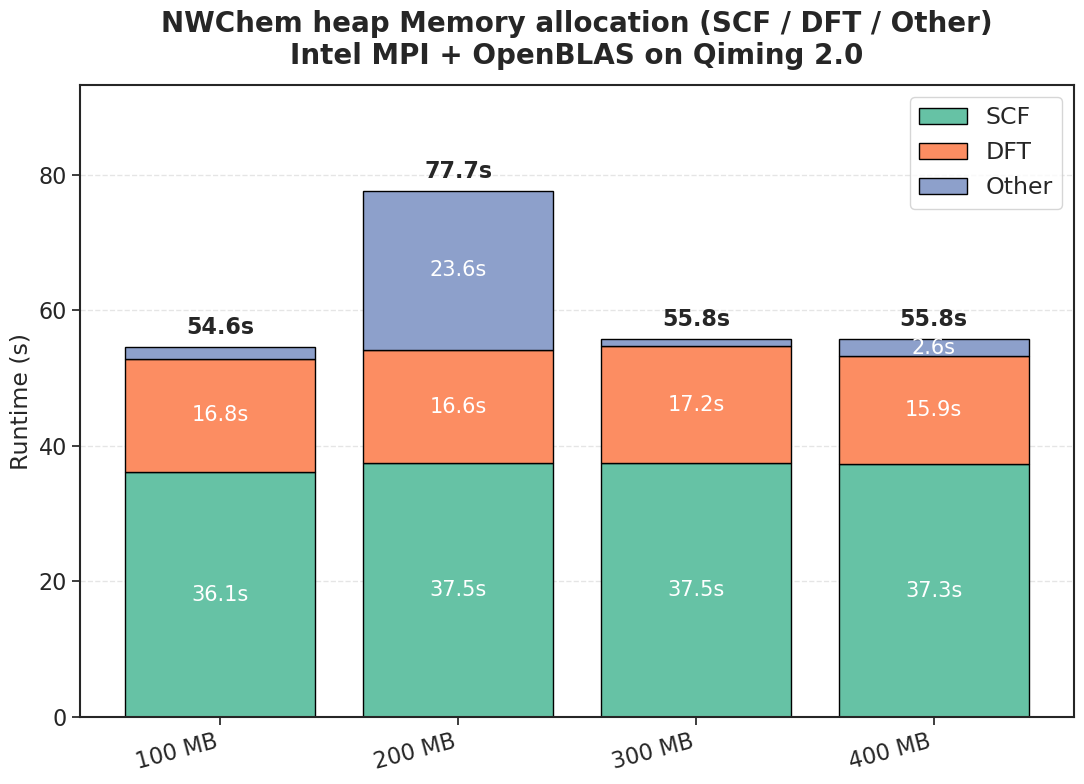

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# -----------------------------
# Seaborn style and palette
# -----------------------------
palette = sns.color_palette('Set2')
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

colors = sns.color_palette()  # 默认 Set2 色板

# -----------------------------
# Data
# -----------------------------
labels = ["100 MB", "200 MB", "300 MB", "400 MB"]
x = np.arange(len(labels))

# runtime = np.array([246.7, 150.0, 98.7, 84.6])
# scf = np.array([169.9, 98.4, 69.3, 58.9])
# dft = np.array([76.4, 38.4, 28.7, 25.0])

heap = np.array([100, 200, 300, 400])
total = np.array([54.6, 77.7, 55.8, 55.8])
scf   = np.array([36.1, 37.5, 37.5, 37.3])
dft   = np.array([16.8, 16.6, 17.2, 15.9])

runtime = total.copy()

# Compute other
other = total - (scf + dft)
other = np.where(other < 0, 0, other)

# Construct dataframe (可选打印)
df = pd.DataFrame({
    "Config": labels,
    "Runtime (s)": total,
    "SCF (s)": scf,
    "DFT (s)": dft,
    "Other (s)": other,
    "SCF %": np.round(100 * scf / runtime, 1),
    "DFT %": np.round(100 * dft / runtime, 1),
    "Other %": np.round(100 * other / runtime, 1),
})
print(df)

# -----------------------------
# Plot stacked bar chart
# -----------------------------
fig, ax = plt.subplots(figsize=(11, 8))

# Use Set2 colors
p1 = ax.bar(x, scf, color=colors[0], label="SCF", edgecolor='black')
p2 = ax.bar(x, dft, bottom=scf, color=colors[1], label="DFT", edgecolor='black')
p3 = ax.bar(x, other, bottom=scf + dft, color=colors[2], label="Other", edgecolor='black')

# -----------------------------
# Axis and legend styling
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=17)
ax.set_ylabel("Runtime (s)", fontsize=17)
ax.set_title("NWChem heap Memory allocation (SCF / DFT / Other)\nIntel MPI + OpenBLAS on Qiming 2.0",
             fontsize=20, fontweight="bold", pad=15)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.legend(loc="upper right", fontsize=17, frameon=True, fancybox=True)
ax.set_ylim(0, max(runtime) * 1.2)

# Tick and spine styling
ax.tick_params(axis='both', which='major', labelsize=16)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# -----------------------------
# Annotate bars
# -----------------------------
for i, total in enumerate(runtime):
    ax.text(i, total + max(runtime) * 0.015, f"{total:.1f}s",
            ha="center", va="bottom", fontsize=16, fontweight="bold")
    ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s",
            ha="center", va="center", color="white", fontsize=15)
    ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s",
            ha="center", va="center", color="white", fontsize=15)
    if other[i] > 2:
        ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
                ha="center", va="center", color="white", fontsize=15)

# -----------------------------
# Layout and export
# -----------------------------
fig.tight_layout()
plt.savefig("nwchem_baseline_stacked_set2_largefont.png", dpi=220, bbox_inches="tight")
plt.savefig("nwchem_baseline_stacked_set2_largefont.pdf", bbox_inches="tight")
plt.show()


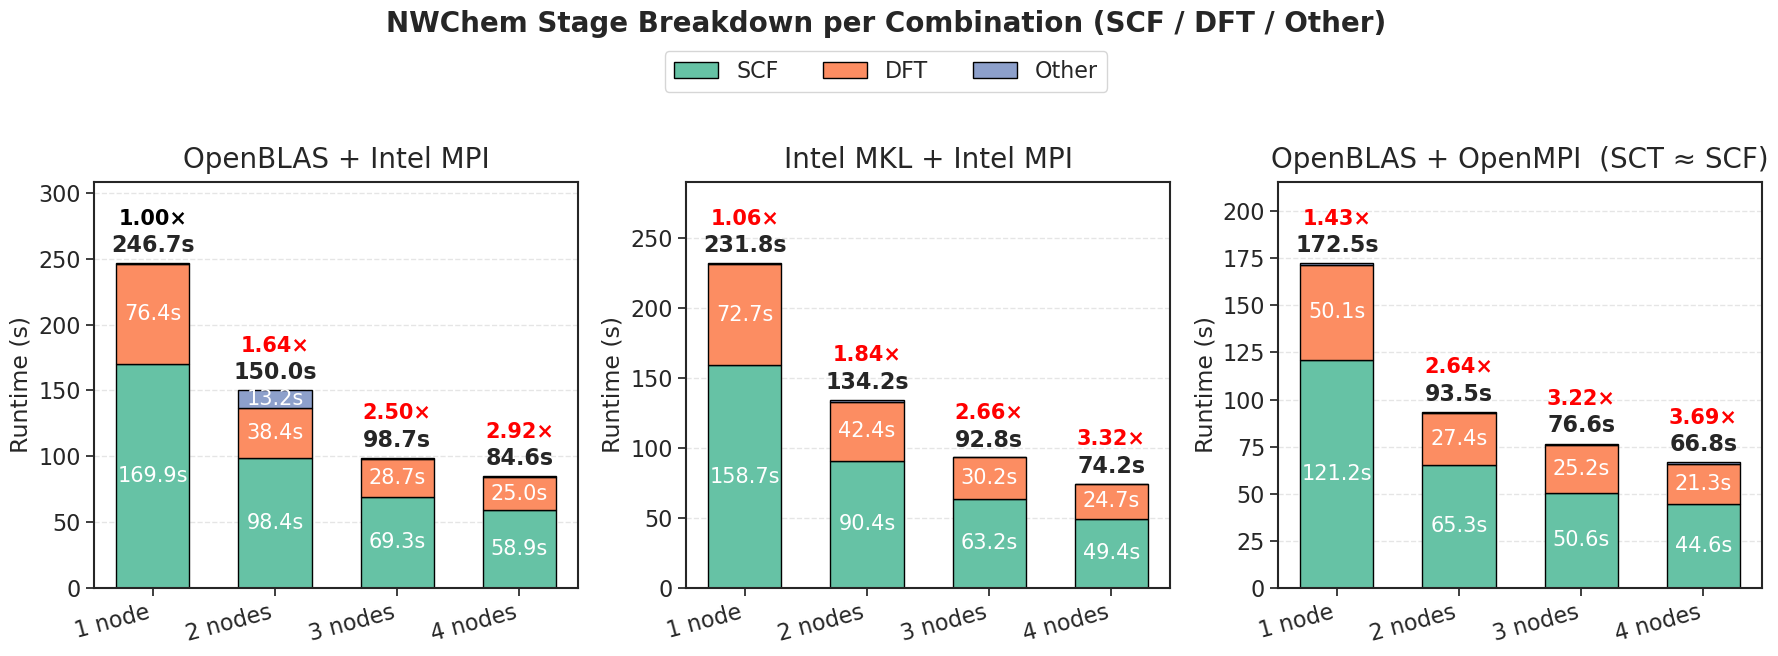


=== Total Runtime & Speedup (vs 1-node) ===
 Nodes  Total_OB+IMPI  Total_MKL+IMPI  Total_OB+OMPI  Speedup_OB+IMPI  Speedup_MKL+IMPI  Speedup_OB+OMPI
     1          246.7           231.8          172.5             1.00              1.00             1.00
     2          150.0           134.2           93.5             1.64              1.73             1.84
     3           98.7            92.8           76.6             2.50              2.50             2.25
     4           84.6            74.2           66.8             2.92              3.12             2.58


In [16]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# =========================================================
# 全局样式（所有字体 >= 15）
# =========================================================
sns.set(style='white', palette='Set2', color_codes=False)
sns.set_style("ticks")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

colors = sns.color_palette('Set2')  # Set2 调色板
seg_colors = [colors[0], colors[1], colors[2]]  # SCF, DFT, Other
line_colors = [colors[3], colors[4], colors[5]]  # 仅三组折线色

# =========================================================
# 数据（节点 1-4；“SCT” 视为 SCF）
# =========================================================
nodes = np.array([1, 2, 3, 4])

# 1) OpenBLAS + Intel MPI
tot_ob_impi = np.array([246.7, 150.0, 98.7, 84.6])
scf_ob_impi = np.array([169.9,  98.4, 69.3, 58.9])
dft_ob_impi = np.array([ 76.4,  38.4, 28.7, 25.0])

# 2) Intel MKL + Intel MPI
tot_mkl_impi = np.array([231.8, 134.2, 92.8, 74.2])
scf_mkl_impi = np.array([158.7,  90.4, 63.2, 49.4])
dft_mkl_impi = np.array([ 72.7,  42.4, 30.2, 24.7])

# 3) OpenBLAS + OpenMPI  （原表中 “SCT” 等同于 SCF）
tot_ob_ompi = np.array([172.5,  93.5, 76.6, 66.8])
scf_ob_ompi = np.array([121.2,  65.3, 50.6, 44.6])  # “SCT”
dft_ob_ompi = np.array([ 50.1,  27.4, 25.2, 21.3])

def other_part(total, scf, dft):
    o = total - (scf + dft)
    return np.where(o < 0, 0.0, o)

# 为每组算 Other（仅三组）
other_ob_impi = other_part(tot_ob_impi, scf_ob_impi, dft_ob_impi)
other_mkl_impi = other_part(tot_mkl_impi, scf_mkl_impi, dft_mkl_impi)
other_ob_ompi  = other_part(tot_ob_ompi, scf_ob_ompi, dft_ob_ompi)


baseline_total = np.array([246.7, 150.0, 98.7, 84.6], dtype=float)

# =========================================================
# 图 2：1×3 小 multiples —— 每组一个堆叠柱（SCF/DFT/Other）
# =========================================================
# def stacked_panel(ax, title, total, scf, dft, other):
#     x = np.arange(len(nodes))
#     bw = 0.6

#     ax.bar(x, scf, width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
#     ax.bar(x, dft, width=bw, bottom=scf, color=seg_colors[1], edgecolor='black', label='DFT')
#     ax.bar(x, other, width=bw, bottom=scf + dft, color=seg_colors[2], edgecolor='black', label='Other')

#     ymax = float(np.max(total) * 1.2)
#     ax.set_ylim(0, ymax)
#     ax.set_xticks(x)
#     ax.set_xticklabels([f"{n} node" if n == 1 else f"{n} nodes" for n in nodes], rotation=15, ha='right')
#     ax.set_ylabel("Runtime (s)")
#     ax.set_title(title, pad=10)
#     ax.grid(True, axis="y", linestyle="--", alpha=0.5)

#     # 标注每段与总计
#     for i, t in enumerate(total):
#         ax.text(i, t + ymax * 0.015, f"{t:.1f}s", ha="center", va="bottom",
#                 fontsize=16, fontweight="bold")
#         ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s", ha="center", va="center",
#                 color="white", fontsize=15)
#         ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s", ha="center", va="center",
#                 color="white", fontsize=15)
#         if other[i] > 2:
#             ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
#                     ha="center", va="center", color="white", fontsize=15)

def stacked_panel(ax, title, total, scf, dft, other):
    x = np.arange(len(nodes))
    bw = 0.6

    # 绘制堆叠柱
    ax.bar(x, scf,  width=bw, color=seg_colors[0], edgecolor='black', label='SCF')
    ax.bar(x, dft,  width=bw, bottom=scf,       color=seg_colors[1], edgecolor='black', label='DFT')
    ax.bar(x, other,width=bw, bottom=scf + dft, color=seg_colors[2], edgecolor='black', label='Other')

    # 为了容纳顶部两行标注，把上限放宽一些
    ymax = float(np.max(total) * 1.25)
    ax.set_ylim(0, ymax)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{n} node" if n == 1 else f"{n} nodes" for n in nodes], rotation=15, ha='right')
    ax.set_ylabel("Runtime (s)")
    ax.set_title(title, pad=10)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)

    # baseline 用于计算 speedup
    sp = baseline_total[0] / total  # 

    # 标注每段与总计 + speedup
    for i, t in enumerate(total):
        # 行1：总时间（粗体）
        ax.text(i, t + ymax * 0.015, f"{t:.1f}s",
                ha="center", va="bottom", fontsize=16, fontweight="bold")

        # 行2：speedup（>1 红色，否则黑色；1 节点即 1.00×）
        sp_color = 'red' if sp[i] > 1.0 else 'black'
        ax.text(i, t + ymax * 0.085, f"{sp[i]:.2f}×",
                ha="center", va="bottom", fontsize=15, fontweight="bold", color=sp_color)

        # 段内标注（白字）
        ax.text(i, scf[i] / 2, f"{scf[i]:.1f}s", ha="center", va="center",
                color="white", fontsize=15)
        ax.text(i, scf[i] + dft[i] / 2, f"{dft[i]:.1f}s", ha="center", va="center",
                color="white", fontsize=15)
        if other[i] > 2:
            ax.text(i, scf[i] + dft[i] + other[i] / 2, f"{other[i]:.1f}s",
                    ha="center", va="center", color="white", fontsize=15)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)


fig2, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

stacked_panel(
    axes[0],
    "OpenBLAS + Intel MPI",
    tot_ob_impi, scf_ob_impi, dft_ob_impi, other_ob_impi
)
stacked_panel(
    axes[1],
    "Intel MKL + Intel MPI",
    tot_mkl_impi, scf_mkl_impi, dft_mkl_impi, other_mkl_impi
)
stacked_panel(
    axes[2],
    "OpenBLAS + OpenMPI  (SCT ≈ SCF)",
    tot_ob_ompi, scf_ob_ompi, dft_ob_ompi, other_ob_ompi
)

# 统一图例（只放一处）
handles, labels = axes[0].get_legend_handles_labels()
fig2.legend(handles, labels, loc="upper center", ncol=3, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.05))

fig2.suptitle("NWChem Stage Breakdown per Combination (SCF / DFT / Other)", y=1.10, fontsize=20, fontweight='bold')
fig2.tight_layout()
fig2.savefig("nwchem_stacked_panels.png", dpi=220, bbox_inches="tight")
fig2.savefig("nwchem_stacked_panels.pdf", bbox_inches="tight")
plt.show()

# =========================================================
# 打印对比表 & Speedup（相对 1 节点）—— 三组
# =========================================================
def speedup(arr): return arr[0] / arr
summary = pd.DataFrame({
    "Nodes": nodes,
    "Total_OB+IMPI": tot_ob_impi,
    "Total_MKL+IMPI": tot_mkl_impi,
    "Total_OB+OMPI": tot_ob_ompi,
    "Speedup_OB+IMPI": np.round(speedup(tot_ob_impi), 2),
    "Speedup_MKL+IMPI": np.round(speedup(tot_mkl_impi), 2),
    "Speedup_OB+OMPI": np.round(speedup(tot_ob_ompi), 2),
})
print("\n=== Total Runtime & Speedup (vs 1-node) ===")
print(summary.to_string(index=False))


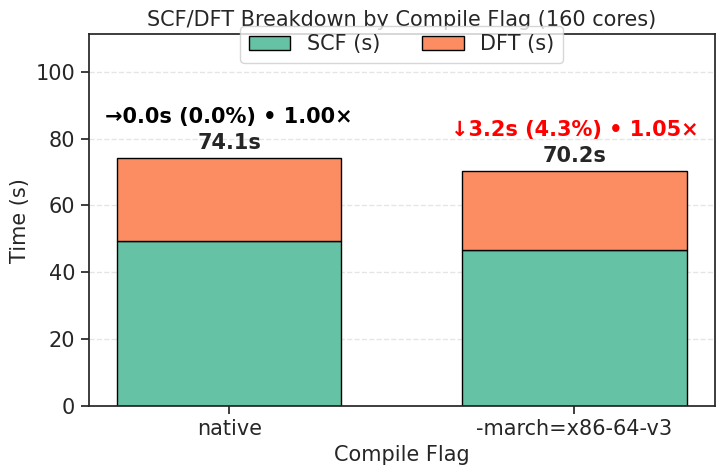

In [12]:
# Create a clean, reproducible comparison of compile flags for NWChem timings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ============== 全局样式：统一字体大小为 15 =================
plt.rcParams.update({
    "font.size": 15,
    "axes.titlesize": 15,
    "axes.labelsize": 15,
    "legend.fontsize": 15,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

# -----------------------------
# Data
# -----------------------------
data = [
    {"Flag": "native",            "Cores": 160, "Total_s": 74.2, "SCF_s": 49.4, "DFT_s": 24.7},
    {"Flag": "-march=x86-64-v3",  "Cores": 160, "Total_s": 71.0, "SCF_s": 46.8, "DFT_s": 23.4},
]
df = pd.DataFrame(data)

# 以 native 作为基线
baseline_total = df.loc[df["Flag"] == "native", "Total_s"].values[0]
df["Speedup_vs_native"] = baseline_total / df["Total_s"]
df["Delta_s"] = baseline_total - df["Total_s"]
df["Delta_pct"] = df["Delta_s"] / baseline_total * 100.0

# -----------------------------
# Plot: SCF + DFT breakdown (stacked)
# -----------------------------
fig = plt.figure(figsize=(7.5, 5.0))
x = np.arange(len(df))
width = 0.65

# 堆叠：SCF 在下，DFT 在上
scf_bar = plt.bar(x, df["SCF_s"].values, width=width, label="SCF (s)", edgecolor="black")
dft_bar = plt.bar(x, df["DFT_s"].values, bottom=df["SCF_s"].values, width=width, label="DFT (s)", edgecolor="black")

# 轴与网格
plt.title("SCF/DFT Breakdown by Compile Flag (160 cores)")
plt.ylabel("Time (s)")
plt.xlabel("Compile Flag")
plt.xticks(x, df["Flag"].tolist(), rotation=0)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)

# y 轴范围设定
# plt.ylim(0, 100)

# 顶部标注：总时间 + 时间下降 + 加速比
total_heights = df["SCF_s"].values + df["DFT_s"].values
ymax = float(np.max(total_heights) * 1.5)
plt.ylim(0, ymax)

for i, (tot, delta_s, delta_pct, sp) in enumerate(zip(total_heights, df["Delta_s"], df["Delta_pct"], df["Speedup_vs_native"])):
    # 第一行：总时间
    plt.text(i, tot + ymax * 0.015, f"{tot:.1f}s",
             ha="center", va="bottom", fontweight="bold")
    # 第二行：↓ 时间下降 与 加速比；下降为正表示比 baseline 更快
    arrow = "↓" if delta_s > 0 else ("↑" if delta_s < 0 else "→")
    color = "red" if sp > 1.0 else "black"   # 快于 baseline 用红色，否则黑色
    label2 = f"{arrow}{abs(delta_s):.1f}s ({abs(delta_pct):.1f}%) • {sp:.2f}×"
    plt.text(i, tot + ymax * 0.085, label2,
             ha="center", va="bottom", color=color, fontweight="bold")

plt.legend(ncol=2, loc="upper center", bbox_to_anchor=(0.5, 1.05), frameon=True)
plt.tight_layout()
plt.show()
